# Fitz Hugh Nagumo Neuron Model

Computation of trajectory for $(u, w)$ is given by

$$
\frac{du}{dt} = u -\frac{u^3}{3} - w + I
$$

and 

$$
\frac{dw}{dt} = \epsilon (b_0 + b_1 u - w)
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
%matplotlib inline

In [2]:
from neurons import fitzhugh_nagumo

ϵ = 0.1
b0 = 2.
b1 = 1.5

dudt = lambda U,W,I : U - U**3 / 3 - W + I
dwdt = lambda U,W : ϵ * (b0 + b1 * U - W)

def compute_trajectory(u0, w0, I, steps, dt):
    uu = [u0]
    ww = [w0]
    tt = [0]
    
    for t in range(1,steps):
        tt.append(t*dt)
        uu.append(uu[-1] + dudt(uu[-1], ww[-1], I) * dt)
        ww.append(ww[-1] + dwdt(uu[-1], ww[-1]) * dt)
        
    return np.array(tt), np.array(uu), np.array(ww)

Plot derivatives at each location, zero curves as well as trajectories for different input currents.

In [3]:
def trajectory_plot(I = 2):
    w_u0 = lambda u : (u - u**3 / 3 + I)
    u_u0 = lambda u : b0 + b1 * u

    U, W = np.meshgrid(np.arange(-3, 3, .5), np.arange(-3, 5, .5))
    dU = dudt(U,W,I)
    dW = dwdt(U,W)

    # Quiver Plot
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    Q = plt.quiver(U,W,dU, dW, width=0.003, scale=100)
    qk = plt.quiverkey(Q, 0, 0, 3, r'$\dot x$', labelpos='N',
                       fontproperties={'weight': 'bold'})
    l, r, b, t = plt.axis()
    dx, dy = r - l, t - b
    
    plt.axis([-3,3,-3,5])

    # Zero Lines
    uu = np.linspace(-3,3,100)
    plt.plot(uu, w_u0(uu))
    plt.plot(uu, u_u0(uu))

    # Trajectory
    tt, uu, ww = compute_trajectory(-2,-2,I,10000,0.01)
    plt.plot(uu, ww)

    plt.xlabel(r"$u$")
    plt.ylabel(r"$w$")
    
    plt.subplot(1,2,2)
    plt.xlabel("Time")
    plt.title("Time Course")
    
    ax1 = plt.gca()
    ax1.plot(tt,uu)
    ax1.set_ylabel("Voltage [ms]")

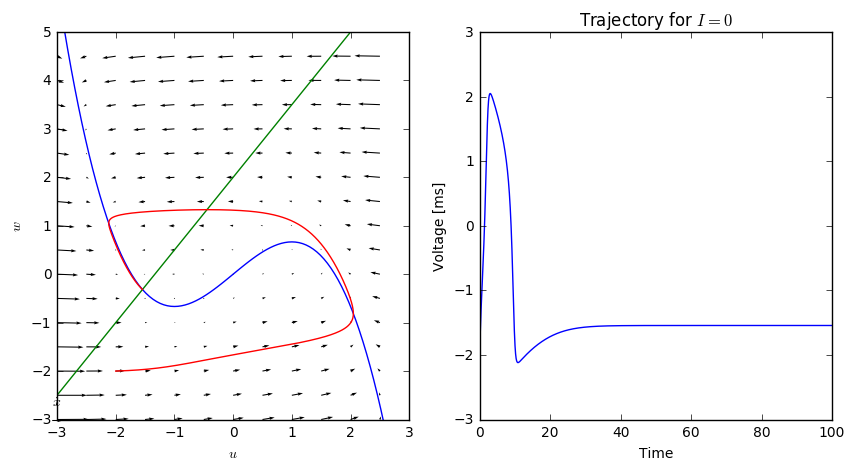

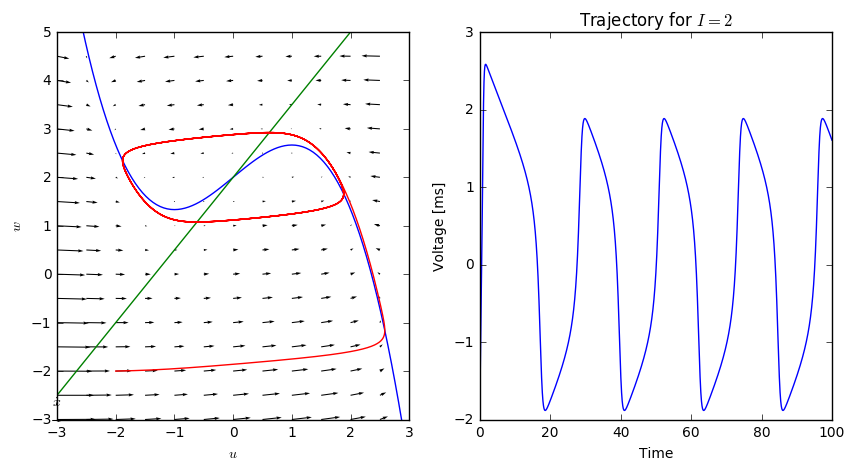

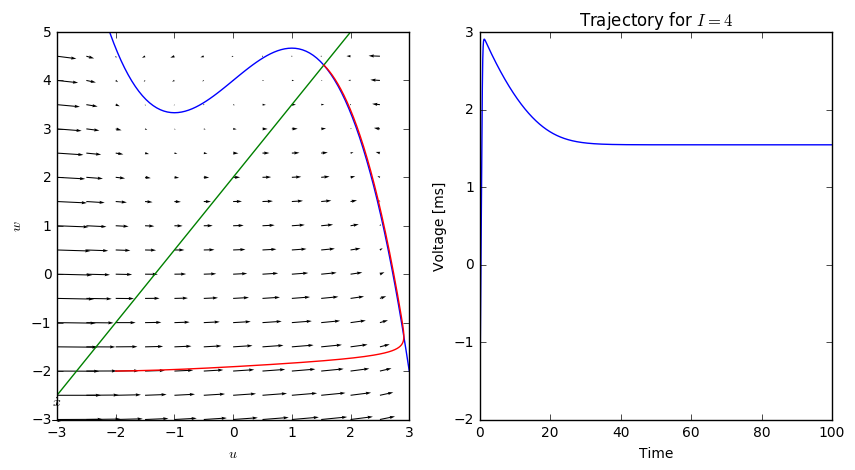

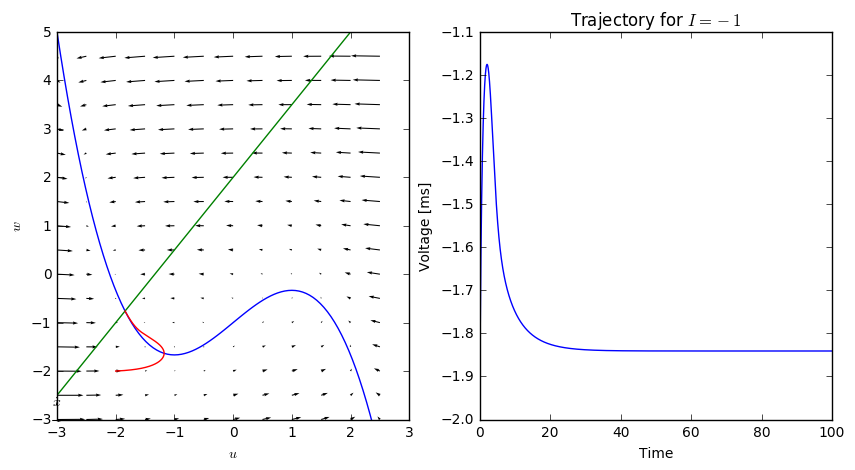

In [4]:
trajectory_plot(I=0)
plt.title(r"Trajectory for $I=0$")
plt.show()

trajectory_plot(I=2)
plt.title(r"Trajectory for $I=2$")
plt.show()

trajectory_plot(I=4)
plt.title(r"Trajectory for $I=4$")
plt.show()

trajectory_plot(I=-1)
plt.title(r"Trajectory for $I=-1$")
plt.show()

In [13]:
from neurons import fitzhugh_nagumo
import time
%matplotlib notebook

def plttime(ax, t, u):
    if ax.lines:
        for line in ax.lines:
            line.set_xdata(t)
            line.set_ydata(u)
    else:
        ax.plot(t, u)
    fig.canvas.draw()
    
def pltquiver(ax, u, w, I):
    w_u0 = lambda u : (u - u**3 / 3 + I/10)
    u_u0 = lambda u : b0 + b1 * u
    
    if ax.lines:
        uu = np.linspace(-3,3,100)
        xdata = [u, uu, uu]
        ydata = [w, w_u0(uu), u_u0(uu)]
        for line, x, y in zip(ax.lines, xdata, ydata):
            line.set_xdata(x)
            line.set_ydata(y)
    else:
        uu = np.linspace(-3,3,100)
        xdata = [u, uu, uu]
        ydata = [w, w_u0(uu), u_u0(uu)]
        
        for x,y in zip(xdata, ydata):
            ax.plot(x, y)
    fig.canvas.draw()

def animate(t, I):
    uu, params = fitzhugh_nagumo(t, I, rescale=False)
    ww, = params
    fig, axes = plt.subplots(1,2,figsize=(10,5))
    ax1 = axes[0]
    ax2 = axes[1]
    for i in range(0,len(t),100):
        plttime(ax1, t[:i], uu[:i])
        pltquiver(ax2, uu[:i], ww[:i], I[i])
        ax1.set_xlim([0,t[-1]])
        ax1.set_ylim([-3,3])
        ax1.set_xlabel("Time [ms]")
        ax1.set_ylabel("Voltage [arbitrary]")
        ax1.set_title("t = {:.3f} ms".format(t[i]))

        ax2.set_xlim([-3,3])
        ax2.set_ylim([-3,5])
        ax2.set_xlabel("u")
        ax2.set_ylabel("w")

        ax2.set_title("I = {:.3f} pA".format(I[i]))
        time.sleep(0.1)

# Animation of the Excitation Block

<IPython.core.display.Javascript object>


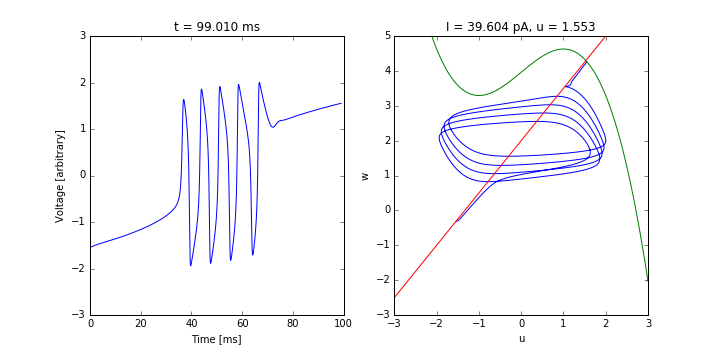

In [23]:
nb_timesteps = 10000
dt = .01
I = np.linspace(0,40,nb_timesteps)
t = np.linspace(0,dt*nb_timesteps,nb_timesteps)

uu, params = fitzhugh_nagumo(t, I, rescale=False)
ww, = params
fig, axes = plt.subplots(1,2,figsize=(10,5),num="Excitation Block")
ax1 = axes[0]
ax2 = axes[1]
for i in range(0,len(t),100):
    plttime(ax1, t[:i], uu[:i])
    pltquiver(ax2, uu[:i], ww[:i], I[i])
    ax1.set_xlim([0,t[-1]])
    ax1.set_ylim([-3,3])
    ax1.set_xlabel("Time [ms]")
    ax1.set_ylabel("Voltage [arbitrary]")
    ax1.set_title("t = {:.3f} ms".format(t[i]))

    ax2.set_xlim([-3,3])
    ax2.set_ylim([-3,5])
    ax2.set_xlabel("u")
    ax2.set_ylabel("w")

    ax2.set_title("I = {:.3f} pA, u = {:.3f}".format(I[i], uu[i]))
    time.sleep(0.1)

# Animation of Rebound Firing

<IPython.core.display.Javascript object>


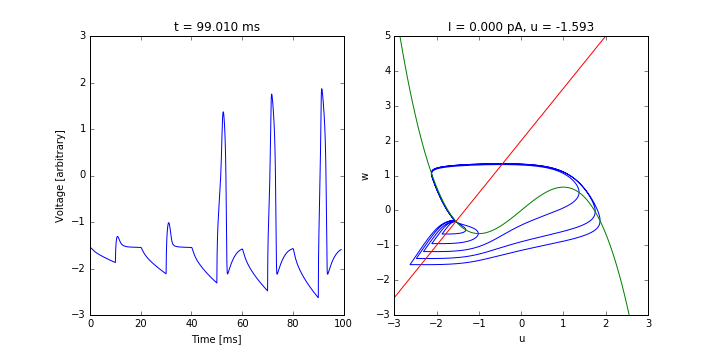

In [25]:
nb_timesteps = 10000
dt = .01
I = np.zeros(nb_timesteps)

step = -10
for i in range(0,10):
    if i%2 == 0:
        I[i*nb_timesteps//10:(i+1)*nb_timesteps//10] = np.linspace(0,step,nb_timesteps//10)
        step -= 10

t = np.linspace(0,dt*nb_timesteps,nb_timesteps)

uu, params = fitzhugh_nagumo(t, I, rescale=False)
ww, = params
fig, axes = plt.subplots(1,2,figsize=(10,5),num='Rebound Firing')
ax1 = axes[0]
ax2 = axes[1]
for i in range(0,len(t),100):
    plttime(ax1, t[:i], uu[:i])
    pltquiver(ax2, uu[:i], ww[:i], I[i])
    ax1.set_xlim([0,t[-1]])
    ax1.set_ylim([-3,3])
    ax1.set_xlabel("Time [ms]")
    ax1.set_ylabel("Voltage [arbitrary]")
    ax1.set_title("t = {:.3f} ms".format(t[i]))

    ax2.set_xlim([-3,3])
    ax2.set_ylim([-3,5])
    ax2.set_xlabel("u")
    ax2.set_ylabel("w")

    ax2.set_title("I = {:.3f} pA, u = {:.3f}".format(I[i], uu[i]))
    time.sleep(0.1)